In [1]:
!pip install keras_preprocessing.sequence

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement keras_preprocessing.sequence (from versions: none)
ERROR: No matching distribution found for keras_preprocessing.sequence


In [2]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import Normalize
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from math import floor
import seaborn as sn
import pandas as pd
import numpy as np
import pickle
import string
import nltk
import re
from sklearn.metrics import accuracy_score
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding
from nltk.tokenize import word_tokenize

connect to google drive

In [3]:
from google.colab import drive
drive.mount("/content/drive/")
%cd drive/MyDrive

Mounted at /content/drive/
/content/drive/MyDrive


In [4]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.3-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-linux_x86_64.whl size=4402764 sha256=4af4dd26514c0fe33ab4d3fdf4aea10bb7bf97b6205b70094f6a17c71ff2d2ce
  Stored in directory: /root/.cache/pip/wheels/93/61/2a/c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully built fasttext


In [5]:
import fasttext

read data and fasttext model

In [6]:
model = fasttext.load_model("cc.fa.300.bin")

In [7]:
data1 = pd.read_csv("Data - Sheet1.csv")
data2 = pd.read_csv("Data - Sheet2.csv")
data3 = pd.read_csv("Data - Sheet3.csv")
data = pd.concat([data1, data2, data3], axis=0)

In [8]:
tokens = np.asarray(data)

In [9]:
tagged_sentence = []
tagged_sentences = []
sentences=[]
sentence=[]
for token in tokens:
    if pd.isna(token[0]):
        tagged_sentences.append(tagged_sentence)
        sentences.append(sentence)
        tagged_sentence = []
        sentence=[]
    else:
        sentence.append(token[0])
        tagged_sentence.append((token[0], token[1]))

In [10]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([" ".join(doc) for doc in sentences])

In [11]:
feature_names = vectorizer.get_feature_names()
scores = X.toarray()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
tagged_sentences[0][1][0]

'واسه'

In [13]:
tfidf = []
labels = []  
for i, sentence in (enumerate(tagged_sentences)):
  first_sentence_scores = scores[i]
  tfidf_scores = {feature_names[j]: first_sentence_scores[j] for j in range(len(feature_names)) if feature_names[j] in sentences[i]}
  
  for word in sentence:
      try:
           tfidf.append(tfidf_scores[word[0]]* model.get_word_vector(word[0]))
           labels.append(word[1])
      except:
        ''             

In [189]:
train_text, test_text, train_labels, test_labels = train_test_split(tfidf, labels, test_size=0.2, random_state=42)

In [190]:
train_text=np.array(train_text)

In [191]:
import tensorflow as tf

In [195]:
X_test = np.array(test_text)
X_train = np.array(train_text)
train_labels = np.array(train_labels)

In [199]:
X_train = tf.convert_to_tensor(X_train)

In [200]:
train_labels=np.array(train_labels)
train_labels[train_labels=="C"]=0
train_labels[train_labels=="N"]=1
train_labels[train_labels=='F']=2

In [201]:
test_labels=np.array(test_labels)
test_labels[test_labels=="C"]=0
test_labels[test_labels=="N"]=1
test_labels[test_labels=='F']=2

training the model

In [203]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes=3)
train_label2 = to_categorical(train_label2, num_classes=3)


In [213]:
test_labels = to_categorical(test_labels, num_classes=3)

In [206]:
model = Sequential()
model.add(LSTM(128, input_shape=(300, 1)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [282]:
model.fit(X_train, train_labels, epochs=100, batch_size=16)

Epoch 1/100
244/244 [==============================] - 4s 16ms/step - loss: 0.5612 - accuracy: 0.7863
Epoch 2/100
244/244 [==============================] - 3s 13ms/step - loss: 0.5435 - accuracy: 0.7899
Epoch 3/100
244/244 [==============================] - 3s 13ms/step - loss: 0.5392 - accuracy: 0.7879
Epoch 4/100
244/244 [==============================] - 3s 13ms/step - loss: 0.5047 - accuracy: 0.8020
Epoch 5/100
244/244 [==============================] - 4s 16ms/step - loss: 0.5414 - accuracy: 0.7827
Epoch 6/100
244/244 [==============================] - 3s 13ms/step - loss: 0.5091 - accuracy: 0.7974
Epoch 7/100
244/244 [==============================] - 3s 13ms/step - loss: 0.5173 - accuracy: 0.7948
Epoch 8/100
244/244 [==============================] - 3s 13ms/step - loss: 0.5201 - accuracy: 0.7951
Epoch 9/100
244/244 [==============================] - 4s 16ms/step - loss: 0.5096 - accuracy: 0.7933
Epoch 10/100
244/244 [==============================] - 3s 13ms/step - loss: 0.501

saving model

In [283]:
preperd_data = np.array([X_test[:]])
preperd_data = preperd_data.reshape((-1,300))

In [285]:
predict = model.predict(preperd_data)
th1 = 0.5
th2 = 1.5
predict[predict>th2]=2
predict[predict<th1]=0
predict[(predict > 0) & (predict < 2)] = 1
# a

print(classification_report(test_labels[:], predict))


31/31 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.91      0.65      0.76       145
           1       0.89      0.98      0.93       669
           2       0.94      0.77      0.84       159

   micro avg       0.90      0.89      0.90       973
   macro avg       0.91      0.80      0.84       973
weighted avg       0.90      0.89      0.89       973
 samples avg       0.89      0.89      0.89       973



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [286]:
from sklearn.metrics import classification_report, confusion_matrix


In [287]:
def CM_drawer(array):
  df_cm = pd.DataFrame(array)
  sn.heatmap(df_cm, annot=True, cmap="YlGnBu_r")

In [288]:
tl2 = np.zeros(len(test_labels)) 
pr2 = np.zeros(len(test_labels))
for i in range(len(tl2)):
    tl2[i] = np.argmax(test_labels[i], axis=None, out=None)
    pr2[i] = np.argmax(predict[i], axis=None, out=None)

              precision    recall  f1-score   support

           0       0.91      0.65      0.76       145
           1       0.89      0.98      0.93       669
           2       0.94      0.77      0.84       159

   micro avg       0.90      0.89      0.90       973
   macro avg       0.91      0.80      0.84       973
weighted avg       0.90      0.89      0.89       973
 samples avg       0.89      0.89      0.89       973

accuracy:  0.895


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


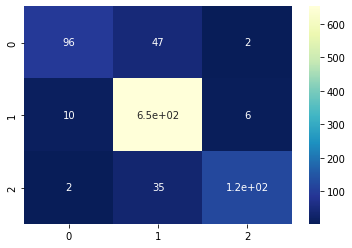

In [289]:
print(classification_report(test_labels[:], predict))
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(tl2, pr2)
print("accuracy: ",round(accuracy,3))
cm = confusion_matrix(tl2[:], pr2)
# print(cm)
CM_drawer(cm)

In [ ]:
import pickle

with open('fasttext_sequence.pickle', 'wb') as handle:
    pickle.dump(model, handle)